# Project: Investigate a Dataset (TMDb Movie Data)
The content of this notebook is the original work of Xavier López done as a project from the *Data Analysis* Udacity's.nanodegree.

The goal of the notebook is to do data analysis on a given dataset and answer data-related questions using python data manipulation and visualization.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


>The aim of this notebook is to investigate a given data set, play with the data and answer research questions on the way. 
>The data set choice has been 
<a href="https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1532469042115000">The Movie Database (TMDb)</a>. This dataset contains data cleaned from an orignal <a href = "https://www.kaggle.com/tmdb/tmdb-movie-metadata"> "Kaggle dataset" </a>.
>
>The sutdied dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including genre, cast, release_year, user ratings and revenue.

>The research questions I have been interested on answering can be classified in two categories:
- **Genre/Cast based**:
>>**RQ1:** Which genres have a greater average vote form year to year?
>>
>>**RQ2:** What distribution of genres does the dataset present? 
>>
>>**RQ3:** How was the distribution in the most recent year? How was in the latest year?
>>
>>**RQ4**: How has the distribution evolved during the years? did all genres grow in the same rate? 
>>
>>**RQ5:** What are the top 5 more frequent genres on the dataset?
>>
>>**RQ6:** For each of those top 5 genres, report the name of the three cast members that appear in more movies of the given genre, and the number of movies in which they appear.
>
>- **Revenue based**:
>>**RQ7:** What genres are more profitable (profit = revenue - budget)?
>>
>>**RQ8:** From the most profitable genre, which *producer* has the most profitable average film production?

In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, data is loaded, checked for cleanliness and then we proceede to trim and clean the dataset for analysis.
>
> The tasks that will be done are:
> - Drop unnecessary features
> - Drop duplicates and NaNs for the "imdb_id" 

### General Properties

> Before proceeding, we list the fields that we will need to answer the research questions:
> - movie name
> - genre
> - year of release
> - average vote
> - cast members
> - revenue
> - budget
> - producer
>
>Lets get started reading the data:





In [230]:
df = pd.read_csv("data/tmdb-movies.csv")
df.set_index("id", inplace = True)
df.head(10).T

id,135397,76341,262500,140607,168259,281957,87101,286217,211672,150540
imdb_id,tt0369610,tt1392190,tt2908446,tt2488496,tt2820852,tt1663202,tt1340138,tt3659388,tt2293640,tt2096673
popularity,32.9858,28.4199,13.1125,11.1731,9.33501,9.1107,8.65436,7.6674,7.40416,6.3268
budget,150000000,150000000,110000000,200000000,190000000,135000000,155000000,108000000,74000000,175000000
revenue,1513528810,378436354,295238201,2068178225,1506249360,532950503,440603537,595380321,1156730962,853708609
original_title,Jurassic World,Mad Max: Fury Road,Insurgent,Star Wars: The Force Awakens,Furious 7,The Revenant,Terminator Genisys,The Martian,Minions,Inside Out
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...
homepage,http://www.jurassicworld.com/,http://www.madmaxmovie.com/,http://www.thedivergentseries.movie/#insurgent,http://www.starwars.com/films/star-wars-episod...,http://www.furious7.com/,http://www.foxmovies.com/movies/the-revenant,http://www.terminatormovie.com/,http://www.foxmovies.com/movies/the-martian,http://www.minionsmovie.com/,http://movies.disney.com/inside-out
director,Colin Trevorrow,George Miller,Robert Schwentke,J.J. Abrams,James Wan,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Alan Taylor,Ridley Scott,Kyle Balda|Pierre Coffin,Pete Docter
tagline,The park is open.,What a Lovely Day.,One Choice Can Destroy You,Every generation has a story.,Vengeance Hits Home,"(n. One who has returned, as if from the dead.)",Reset the future,Bring Him Home,"Before Gru, they had a history of bad bosses",Meet the little voices inside your head.
keywords,monster|dna|tyrannosaurus rex|velociraptor|island,future|chase|post-apocalyptic|dystopia|australia,based on novel|revolution|dystopia|sequel|dyst...,android|spaceship|jedi|space opera|3d,car race|speed|revenge|suspense|car,father-son relationship|rape|based on novel|mo...,saving the world|artificial intelligence|cybor...,based on novel|mars|nasa|isolation|botanist,assistant|aftercreditsstinger|duringcreditssti...,dream|cartoon|imaginary friend|animation|kid


>Drop the columns that are not relevant to answer the research questions:

In [231]:
df.drop(['popularity','homepage','tagline','keywords','overview','runtime','vote_count','release_date'], axis = 1, inplace = True)
df.columns

Index(['imdb_id', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'genres', 'production_companies', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

>Note that the dataset has two columns "id" and "imdb_id". Since the source of "id" is unclear but the source of "imdb_id" is not (it corresponts to the www.imdb.com database id) we will use "imdb_id".
>
>Cheacking for cleanliness we must make sure this "imdb_id" is not repeated or null in our studied dataset:

In [232]:
df['imdb_id'].duplicated().any()

True

In [233]:
df[df['imdb_id'].duplicated()]['imdb_id']

id
287663          NaN
15257           NaN
101907          NaN
42194     tt0411951
45644           NaN
369145          NaN
269177          NaN
279954          NaN
50127           NaN
50128           NaN
Name: imdb_id, dtype: object

In [234]:
len(df[df['imdb_id'].duplicated()]['imdb_id'])

10

In [235]:
df[df['imdb_id'].duplicated()].T.head(5)

id,287663,15257,101907,42194,45644,369145,269177,279954,50127,50128
imdb_id,NaN,NaN,NaN,tt0411951,NaN,NaN,NaN,NaN,NaN,NaN
budget,0,0,0,30000000,0,0,0,500,0,0
revenue,0,0,0,967000,0,0,0,0,0,0
original_title,Star Wars Rebels: Spark of Rebellion,Hulk vs. Wolverine,Hulk vs. Thor,TEKKEN,Opeth: In Live Concert At The Royal Albert Hall,Doctor Who: The Snowmen,Party Bercy,Portal: Survive!,Fallen: The Journey,Fallen: The Destiny
cast,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,Florence Foresti,Monique Blanchard|Bradley Mixon,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...


In [236]:
print("Number of NaN at imdb_id colunn:")
nans_imdbid = len(df[df['imdb_id'].isna()]['imdb_id'])
nans_imdbid

Number of NaN at imdb_id colunn:


10

In [237]:
print("Total number of film entries:")
df.shape[0]

Total number of film entries:


10866

In [238]:
print("% of NaN's at imdb_id compared to the total number of entries of the dataset")
(nans_imdbid/df.shape[0])*100

% of NaN's at imdb_id compared to the total number of entries of the dataset


0.09203018590097553

> Since the number of duplicates in the imdb_id column represent less than 0.1% of the total of entries of the dataset, and they do not seem to have any meaningful reason to exist, those rows will be dropped:

In [239]:
df.dropna(subset=['imdb_id'], inplace=True)

> We have droped NaN's, we should also drop duplicates

In [241]:
df[df['imdb_id'].duplicated()]

,imdb_id,budget,revenue,original_title,cast,director,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,
42194,tt0411951,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,5.0,2010,30000000.0,967000.0


In [242]:
df.drop_duplicates(subset = "imdb_id", keep = "first", inplace = True)

> Now the dataset contains only unique id's on the "imdb_id" column and no NANs on that column.
>
> Lets doublecheck that this statement is correct:

In [243]:
df[df['imdb_id'].duplicated()]

,imdb_id,budget,revenue,original_title,cast,director,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,


In [244]:
df[df['imdb_id'].isna()]

,imdb_id,budget,revenue,original_title,cast,director,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,


In [247]:
df.T

id,135397,76341,262500,140607,168259,281957,87101,286217,211672,150540,...,20277,5921,31918,20620,5060,21,20379,39768,21449,22293
imdb_id,tt0369610,tt1392190,tt2908446,tt2488496,tt2820852,tt1663202,tt1340138,tt3659388,tt2293640,tt2096673,...,tt0061135,tt0060748,tt0060921,tt0060955,tt0060214,tt0060371,tt0060472,tt0060161,tt0061177,tt0060666
budget,150000000,150000000,110000000,200000000,190000000,135000000,155000000,108000000,74000000,175000000,...,0,0,0,0,0,0,0,0,0,19000
revenue,1513528810,378436354,295238201,2068178225,1506249360,532950503,440603537,595380321,1156730962,853708609,...,0,0,0,0,0,0,0,0,0,0
original_title,Jurassic World,Mad Max: Fury Road,Insurgent,Star Wars: The Force Awakens,Furious 7,The Revenant,Terminator Genisys,The Martian,Minions,Inside Out,...,The Ugly Dachshund,Nevada Smith,"The Russians Are Coming, The Russians Are Coming",Seconds,Carry On Screaming!,The Endless Summer,Grand Prix,Beregis Avtomobilya,"What's Up, Tiger Lily?",Manos: The Hands of Fate
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,...,Dean Jones|Suzanne Pleshette|Charles Ruggles|K...,Steve McQueen|Karl Malden|Brian Keith|Arthur K...,Carl Reiner|Eva Marie Saint|Alan Arkin|Brian K...,Rock Hudson|Salome Jens|John Randolph|Will Gee...,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,Michael Hynson|Robert August|Lord 'Tally Ho' B...,James Garner|Eva Marie Saint|Yves Montand|Tosh...,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Harold P. Warren|Tom Neyman|John Reynolds|Dian...
director,Colin Trevorrow,George Miller,Robert Schwentke,J.J. Abrams,James Wan,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Alan Taylor,Ridley Scott,Kyle Balda|Pierre Coffin,Pete Docter,...,Norman Tokar,Henry Hathaway,Norman Jewison,John Frankenheimer,Gerald Thomas,Bruce Brown,John Frankenheimer,Eldar Ryazanov,Woody Allen,Harold P. Warren
genres,Action|Adventure|Science Fiction|Thriller,Action|Adventure|Science Fiction|Thriller,Adventure|Science Fiction|Thriller,Action|Adventure|Science Fiction|Fantasy,Action|Crime|Thriller,Western|Drama|Adventure|Thriller,Science Fiction|Action|Thriller|Adventure,Drama|Adventure|Science Fiction,Family|Animation|Adventure|Comedy,Comedy|Animation|Family,...,Comedy|Drama|Family,Action|Western,Comedy|War,Mystery|Science Fiction|Thriller|Drama,Comedy,Documentary,Action|Adventure|Drama,Mystery|Comedy,Action|Comedy,Horror
production_companies,Universal Studios|Amblin Entertainment|Legenda...,Village Roadshow Pictures|Kennedy Miller Produ...,Summit Entertainment|Mandeville Films|Red Wago...,Lucasfilm|Truenorth Productions|Bad Robot,Universal Pictures|Original Film|Media Rights ...,Regency Enterprises|Appian Way|CatchPlay|Anony...,Paramount Pictures|Skydance Productions,Twentieth Century Fox Film Corporation|Scott F...,Universal Pictures|Illumination Entertainment,Walt Disney Pictures|Pixar Animation Studios|W...,...,Walt Disney Pictures,Paramount Pictures|Solar Productions|Embassy P...,The Mirisch Corporation,Gibraltar Productions|Joel Productions|John Fr...,Peter Rogers Productions|Anglo-Amalgamated Fil...,Bruce Brown Films,Cherokee Productions|Joel Productions|Douglas ...,Mosfilm,Benedict Pictures Corp.,Norm-Iris
vote_average,6.5,7.1,6.3,7.5,7.3,7.2,5.8,7.6,6.5,8,...,5.7,5.9,5.5,6.6,7,7.4,5.7,6.5,5.4,1.5
release_year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,...,1966,1966,1966,1966,1966,1966,1966,1966,1966,1966


In [245]:
#More tasks are done here, here are put randomly

df = df.drop_duplicates(subset = "imdb_id", keep = False, inplace = True)
set([len(str(x)) for x in df["imdb_id"]])



>- Certain columns, like ‘cast’ and ‘genres’ , contain multiple values separated by pipe (|) characters. 
>- There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is. 
>- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

Now that we know what we need, lets read the data and check leanliness:

id,135397,76341,262500,140607,168259,281957,87101,286217,211672,150540
imdb_id,tt0369610,tt1392190,tt2908446,tt2488496,tt2820852,tt1663202,tt1340138,tt3659388,tt2293640,tt2096673
popularity,32.9858,28.4199,13.1125,11.1731,9.33501,9.1107,8.65436,7.6674,7.40416,6.3268
budget,150000000,150000000,110000000,200000000,190000000,135000000,155000000,108000000,74000000,175000000
revenue,1513528810,378436354,295238201,2068178225,1506249360,532950503,440603537,595380321,1156730962,853708609
original_title,Jurassic World,Mad Max: Fury Road,Insurgent,Star Wars: The Force Awakens,Furious 7,The Revenant,Terminator Genisys,The Martian,Minions,Inside Out
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...
homepage,http://www.jurassicworld.com/,http://www.madmaxmovie.com/,http://www.thedivergentseries.movie/#insurgent,http://www.starwars.com/films/star-wars-episod...,http://www.furious7.com/,http://www.foxmovies.com/movies/the-revenant,http://www.terminatormovie.com/,http://www.foxmovies.com/movies/the-martian,http://www.minionsmovie.com/,http://movies.disney.com/inside-out
director,Colin Trevorrow,George Miller,Robert Schwentke,J.J. Abrams,James Wan,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Alan Taylor,Ridley Scott,Kyle Balda|Pierre Coffin,Pete Docter
tagline,The park is open.,What a Lovely Day.,One Choice Can Destroy You,Every generation has a story.,Vengeance Hits Home,"(n. One who has returned, as if from the dead.)",Reset the future,Bring Him Home,"Before Gru, they had a history of bad bosses",Meet the little voices inside your head.
keywords,monster|dna|tyrannosaurus rex|velociraptor|island,future|chase|post-apocalyptic|dystopia|australia,based on novel|revolution|dystopia|sequel|dyst...,android|spaceship|jedi|space opera|3d,car race|speed|revenge|suspense|car,father-son relationship|rape|based on novel|mo...,saving the world|artificial intelligence|cybor...,based on novel|mars|nasa|isolation|botanist,assistant|aftercreditsstinger|duringcreditssti...,dream|cartoon|imaginary friend|animation|kid


In [7]:
df.shape

(10866, 20)

In [11]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj       

In [ ]:
df.drop([columns list], axis = 1, inplace = True)
#####

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019E10BCC3C8>,
      dtype=object)

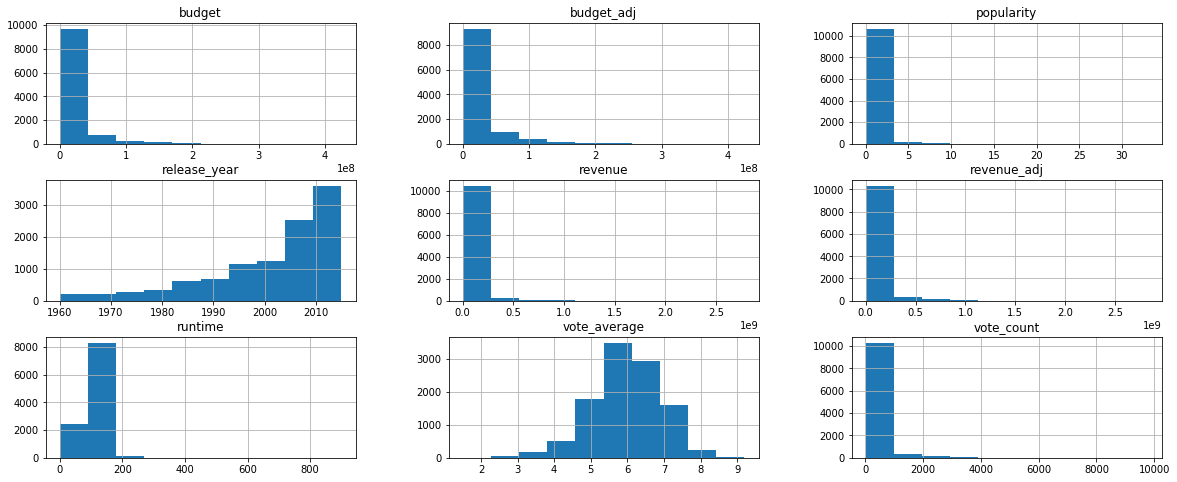

In [15]:
df.hist(figsize = (20,8))

In [18]:
df.revenue

id
135397    1513528810
76341      378436354
262500     295238201
140607    2068178225
168259    1506249360
281957     532950503
87101      440603537
286217     595380321
211672    1156730962
150540     853708609
206647     880674609
76757      183987723
264660      36869414
257344     243637091
99861     1405035767
273248     155760117
260346     325771424
102899     518602163
150689     542351353
131634     650523427
158852     209035668
307081      91709827
254128     470490832
216015     569651467
318846     133346506
177677     682330139
214756     215863606
207703     403802136
314365      88346473
294254     311256926
             ...    
38720              0
19728              0
22383              0
13353              0
34388              0
42701              0
36540              0
29710              0
23728              0
5065               0
17102              0
28763              0
2161        12000000
28270              0
26268              0
15347              0
37301     

In [4]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import matplotlib.pyplot as plt

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!